<a href="https://www.kaggle.com/code/phoebec216/olympics-host-country-advantage-for-uk?scriptVersionId=100413182" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 **Does being host country of the Summer Olympics give the UK an advantage?**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-olympics-medal-tables-1896-2012/SummerOlympics_medals.csv


**Introduction**

Following creation of the Summer Olympics Medal Tables dataset within SQL, starting from an outdated dataset of all medal winners, I decided to conduct some Python analyses on it.

After looking at the UK rankings in previous Olympic Games I asked for other peoples opinions on what analyses I should complete next. One suggestion was to find out whether being a host country  gives the athletes an advantage. This was seen anecdotaly in 2021 in Tokyo, but this analysis will focus on the three occasions that the UK has been host country.

Firstly I will create a dataframe that contains just the UK data and then split this into years where UK hosted (1908, 1948, and 2012) and years where they did not host.

In [2]:
# Downloading data and removing irrelevant values.
full_table = pd.read_csv('../input/summer-olympics-medal-tables-1896-2012/SummerOlympics_medals.csv')
uk = full_table[full_table['Country'] == 'United Kingdom'].sort_values('Year')

# Splitting data into non-host and host years.
uk_host = uk[uk['Year'].isin([1908, 1948, 2012])]
uk_nothost = uk[uk['Year'].isin([1908, 1948, 2012])==False]

Now I will create a function that will be used to produce multiple graphs in this analysis.
Each graph will show the general trend of medals won by the UK in each non-host year, plus the medals won in each host year.

In [3]:
def host_country_advantage_graph(axis, years, medals, years_hosted, medals_h, ylabel):
    """
    Function takes the years and medals won in non-host years and years and medals won in host years, plus the y-axis label.
    Function returns a graph showing the trend of medals in non-host years and the medals won in host years.
    """
    all_years = years.append(years_hosted)
    # axes.figure(figsize=(15, 6))
    axis.set_xticks(all_years)
    axis.set_xlabel("Year", fontsize = "x-large")
    axis.set_ylabel(ylabel, fontsize = "x-large")
    axis.plot(years, medals, color = 'k', linestyle = "--", marker = "o", label = "Non-host year")
    axis.scatter(years_hosted, medals_h, color = 'b', marker = "s", label = "Host year")
    axis.legend(loc = "upper right", fontsize = "large")

**Figures 1**

Now let's view the graphs for total medals won, in addition to golds, silvers and bronzes, to visualise whether more medals were won during each host year.

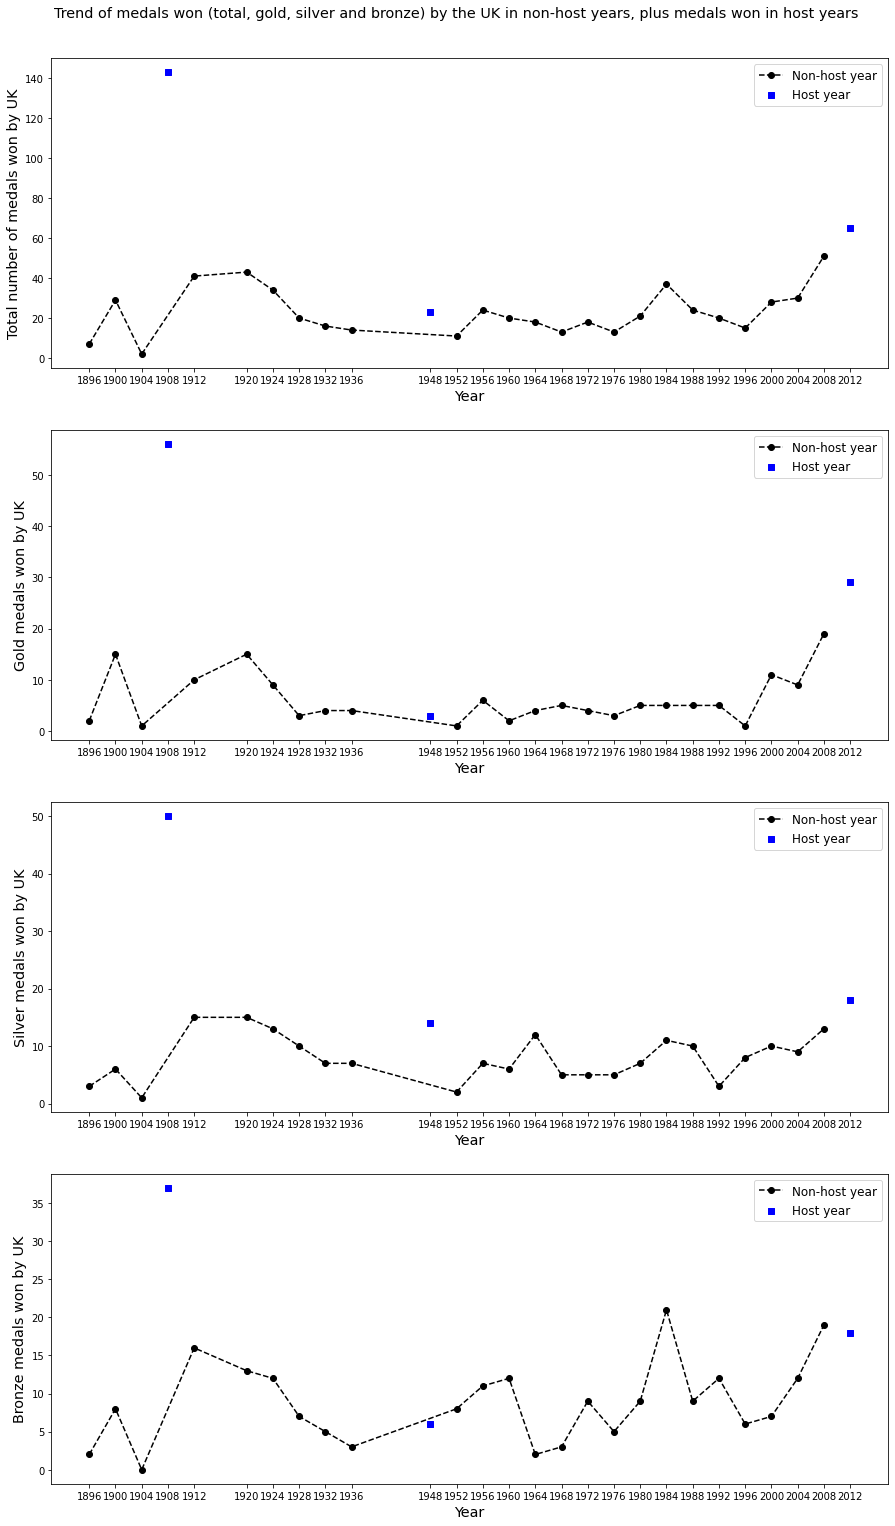

In [4]:
# Creating lists for the years and (total, gold, silver and bronze) medals won in each year.
years = uk_nothost['Year']
years_h = uk_host['Year']
medals = uk_nothost['Medals']
medals_h = uk_host['Medals']
golds = uk_nothost['Golds']
golds_h = uk_host['Golds']
silvers = uk_nothost['Silvers']
silvers_h = uk_host['Silvers']
bronzes = uk_nothost['Bronzes']
bronzes_h = uk_host['Bronzes']

# Visualising the number of medals won (total, gold, silver and bronze).
fig, ax = plt.subplots(4,1,figsize=(15, 24))
host_country_advantage_graph(ax[0], years, medals, years_h, medals_h, "Total number of medals won by UK")
host_country_advantage_graph(ax[1], years, golds, years_h, golds_h, "Gold medals won by UK")
host_country_advantage_graph(ax[2], years, silvers, years_h, silvers_h, "Silver medals won by UK")
host_country_advantage_graph(ax[3], years, bronzes, years_h, bronzes_h, "Bronze medals won by UK")
fig.suptitle("Trend of medals won (total, gold, silver and bronze) by the UK in non-host years, plus medals won in host years", fontsize = "x-large")
fig.subplots_adjust(top=0.95)
plt.show()

**Discussion**

The first graph shows that total medals won have generally stayed between 0 and 30 (other than pre-1928 where the number of medals won is constantly changing) until 1996 where a gradual increase can be seen. There is a similar trend for gold, silver and bronze medals.

Total medals won in 1908, the first host year, is over 2 times higher than in any other year before or since and so clearly being host country benefited the UK massively this year.
 
The same cannot be said for 1948. Total medals won is barely double the number won in 1952 and less than the number won in 1956.  It is however important to note that this was the first Olympics in 12 years following World War 2, and perhaps this affected the number of athletes ready to compete.
  
2012, the most recent Olympics hosted by the UK, is a different case again. Ignoring 1908, total medals won in 2012 was just over 25% higher than in any other year. However, visually this appears as if it may be part of the upwards trend in medals won since 1996.

However, it is also worth noting that each year more and more sports are being offered and so there will be more medals available to win each year. Therefore it may be beneficial to also check the percentage of total medals won each year. 

**Figures 2**

Here I will calculate the percentage of total available medals that the UK won each year and put this data in a graph similar to above.

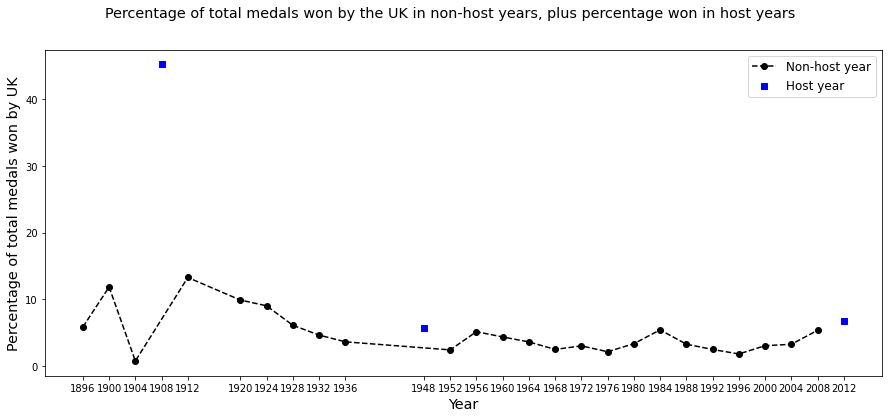

In [5]:
# Calculating the percentage of medals won by the UK in each non-host and host year.
total_medals = []
for year in years:
    total_medals.append(full_table["Medals"][full_table["Year"]==year].sum())

total_medals_h = []
for year in years_h:
    total_medals_h.append(full_table["Medals"][full_table["Year"]==year].sum())

percent = [100*x/y for (x, y) in zip(medals, total_medals)]
percent_h = [100*x/y for (x, y) in zip(medals_h, total_medals_h)]

# Visualising the percentage of medals won.
fig, ax = plt.subplots(figsize=(15, 6))
host_country_advantage_graph(ax, years, percent, years_h, percent_h, "Percentage of total medals won by UK")
fig.suptitle("Percentage of total medals won by the UK in non-host years, plus percentage won in host years", fontsize = "x-large")
plt.show()

**Discussion**

This graph shows a similar pattern to the previous graphs, yet the interpretation can still be debated. 

The 1908 games were clearly the best for the UK, winning over 45% of all the medals available.

The percentage of total medals won in 1948 is actually higher than any other year from 1932 to 2008. This suggests the UK may have had host advantage in this year. However, the advantage was nowhere near as big as in 1908 and so could potentially be viewed as just a slightly better year than usual.

Finally, despite the UK winning a higher percentage of medals in 2012 than they had since pre World War 2, it still appears to be part of the upwards trend since 1996 rather than a host advantage. This would be easier to confirm if viewed alongside data from both 2016 and 2020 games.

**Conclusion**

In answer to the question "Does being host country of the Summer Olympics give the UK an advantage?": maybe.

In all years the Olympics were hosted in the UK, the UK won a higher percentage of medals than in the years leading up to or following that year. However the percentage of medals won was only slightly higher for both 1948 and 2012 and can potentially be explained by other factors. Only 1908 can be said to show a clear advantage for the UK as host country. However, it is worth noting that international travel was a lot less common in 1908 compared to nowadays and so it would be worth researching what percentage of athletes in the 1908 olympics were British as this would have had a greater effect on the number of medals won than the benefit of having a "home-crowd" advantage.

Once again, thank you for reading this analysis. I hope it is interesting to somebody, and as always please provide suggestions for new analyses.